In [1]:
from functions import *
from random import sample
import json
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
import itertools
import re

In [10]:
#base_path = "/media/ruben/Data Drive/react-data/protest/carlo-batch-selection/"
base_path = "D:/react-data/protest/carlo-batch-selection"


# Get URL-ID from entity files
ids_ = dict()

for photo in [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]:
    photo_folder = os.path.join(base_path, photo)
    photo_source = os.listdir(os.path.join(photo_folder,photo+'_'+"source"))[0]
    photo = photo_source #os.path.join(photo_folder,photo+'_'+"source",photo_source)
    if photo not in ids_.keys():
        ids_.update({photo:list()})
    
    folders = [fol for fol in os.listdir(photo_folder) if os.path.isdir(os.path.join(photo_folder,fol)) and "source" not in fol and "context" not in fol]
    
    for f in folders:
        fn = os.path.join(photo_folder, f, "txt","parsed_text.json")

        with open(fn) as fp:
            file = json.load(fp)
        
        for id_ in file.keys():
            
            identif = id_.split("html_")[0].split('html/')[-1][:-1]
            url = id_.split("html_")[1]
            ids_[photo].append(url)

In [11]:
st = []

for photo,urls in ids_.items():
    
    for other_photo,other_urls in ids_.items():
        
        if photo == other_photo:
            continue
        else:
            overlap = [u for u in urls if u in other_urls]
            if len(overlap) > 1:
                st.append([photo, other_photo,len(list(set(overlap)))])


In [12]:
t = [[i[0].split('.')[0],i[1].split('.')[0],i[2]] for i in st]
ttuples = [(i[0].split('.')[0],i[1].split('.')[0]) for i in st]

In [13]:
seen = set()
unique = []
for x in ttuples:
    srtd = tuple(sorted(x))
    if srtd not in seen:
        unique.append(x)
        seen.add(srtd)


In [14]:
t2 = []

for tup in seen:
    source= tup[0]
    target = tup[1]
    weight = [x[2] for x in t if x[0] == source and x[1] == target][0]
    t2.append([source,target,weight])

In [15]:
t2 = pd.DataFrame(t2,columns = ['source','target','weight'])
t2['weight'] = t2['weight'].astype(str)
t2.to_csv('overlap-network-edges.csv',index=False)

In [16]:
nodes = list(set([i[0] for i in st] + [i[1] for i in st]))
nodes = [[i.split('.')[0],i] for i in nodes]

In [17]:
n = pd.DataFrame(nodes,columns = ['id','image'])
n.to_csv('overlap-network-nodes.csv',index=False)

In [35]:
t = t.pivot(index='source',columns='target',values='weight').fillna(0)

In [38]:
t.to_csv('image-collocations.csv',index=False)

<Figure size 432x288 with 0 Axes>

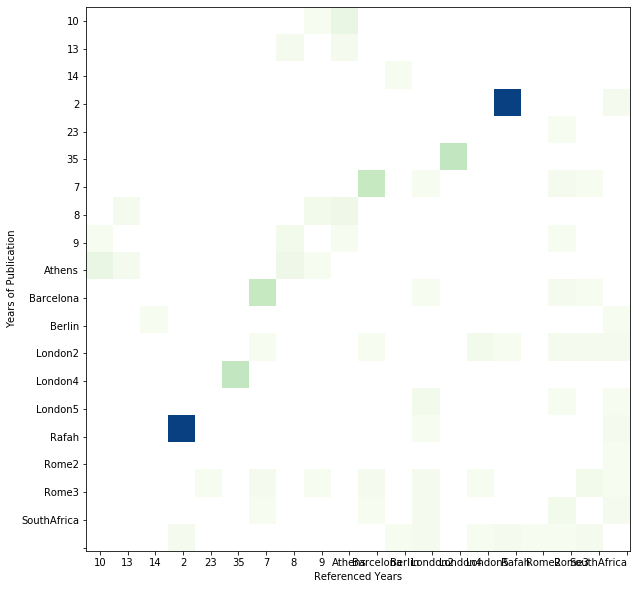

In [15]:
resdf2p = t.pivot(index='source',columns='target',values='weight')

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(30,10))
heatplot = ax.imshow(resdf2p, cmap='GnBu')
ax.set_xticklabels(resdf2p.columns)
ax.set_yticklabels(resdf2p.index)

tick_spacing = 1.02
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.ylabel('Years of Publication')
plt.xlabel('Referenced Years')


plt.show()

In [4]:
df = pd.read_csv(open('/media/ruben/FEF44259F44213F5/Users/Ruben/Documents/GitHub/ReACT_GCV/data/images_tables_article_carlo/data-full.csv','rU'), encoding='utf-8', engine='c')

/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [15]:
linkhits = []

for i in df['topleveldomain']:
    i = str(i).split('.')
    m = max(i, key=len)
    linkhits.append(m)

In [23]:
for i in df['sentences']:
    if i == "nan":
        continue
    else:
        i = str(i).split('||')
        
        if any(x in i for x in linkhits):
            print([x for x in i if any(x in i for x in linkhits)])

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['"tutti hanno diritto di manifestare', 'liberamente il proprio pensiero con la parola, lo scritto e ogni altro mezzo di diffusione.', '"', 'articolo 21 della costituzione italiana. "', 'nel tempo dell’inganno', 'universale dire la verità', 'è un atto rivoluzionario.', '"', 'george orwell – blog antifascista e contro ogni forma di discriminazione.', '“lo sa solo il cielo il perché.', 'per sempre con noi.', 'ciao edo”', '“i colori non dividono un’amicizia.', 'ciao edo”', 'edoardo e carlo', 'si', 'conoscono al liceo scientifico:', 'carlo è in 3°', '(carlo è avanti un anno),', 'edo in 1°.', 'tra loro nasce subito un’amicizia forte che li lega oltre la scuola, negli interessi comuni, nelle amicizie, nelle partite a pallone.', 'un’amicizia che continua a tenerli vicini, anche dopo la fine della scuola; come è normale nella vita, alternano momenti in cui si frequentano di p

['racconto ', 'di come', 'i colleghi hanno operato nei giorni del g8, nonostante tutto', 'lorario ', 'preciso ', 'perch rimasto fissato su un orologio che non funzioner pi, spaccato al primo colpo, testimone della prima carica.piazza paolo da novi, arriviamo alle 11.00 circa.', 'ultimo briefing accanto al\xa0 nostro furgone/ambulanza, ultime disposizioni, ultime raccomandazioni.', 'ci dividiamo in gruppi.', 'fra noi tanto, tanto entusiasmo, un po di tensione, quella giusta, quella positiva.', 'prendiamo posizione e subito verifichiamo se alla fontana della piazza c acqua, - sai, ', 'se dovessero tirare', 'i lacrimogeni-, ingenui.', 'li notiamo, prima a piccoli gruppi, poi sempre', 'pi numerosi, spaccano lasfalto, divelgono ', 'le basse recinzioni', 'delle aiuole, i segnali stradali, lavorano in silenzio, metodici.', 'ci guardiamo, la tensione cresce.', 'ci rassicuriamo luno con ', 'laltro, siamo medici ed infermieri, siamo li per occuparci ', 'di eventuali feriti,', 'e poi lo sanno tut

['racconto ', 'di come', 'i colleghi hanno operato nei giorni del g8, nonostante tutto', 'lorario ', 'preciso ', 'perch rimasto fissato su un orologio che non funzioner pi, spaccato al primo colpo, testimone della prima carica.piazza paolo da novi, arriviamo alle 11.00 circa.', 'ultimo briefing accanto al\xa0 nostro furgone/ambulanza, ultime disposizioni, ultime raccomandazioni.', 'ci dividiamo in gruppi.', 'fra noi tanto, tanto entusiasmo, un po di tensione, quella giusta, quella positiva.', 'prendiamo posizione e subito verifichiamo se alla fontana della piazza c acqua, - sai, ', 'se dovessero tirare', 'i lacrimogeni-, ingenui.', 'li notiamo, prima a piccoli gruppi, poi sempre', 'pi numerosi, spaccano lasfalto, divelgono ', 'le basse recinzioni', 'delle aiuole, i segnali stradali, lavorano in silenzio, metodici.', 'ci guardiamo, la tensione cresce.', 'ci rassicuriamo luno con ', 'laltro, siamo medici ed infermieri, siamo li per occuparci ', 'di eventuali feriti,', 'e poi lo sanno tut

['breve cronologia dei fatti del 20 luglio 2001:', 'il vicepresidente del consiglio, on.', 'gianfranco fini, con altri esponenti', 'di alleanza nazionale, tra cui l’on.', 'ascierto, si trovano nella caserma dei carabinieri di san giuliano dove si trattengono per diverse ore.', 'le forze', 'dell’ordine vengono dislocate nelle zone dove', 'passeranno i cortei e nelle vicinanze delle piazze tematiche.', 'sono stati rimossi', 'i cestini della spazzatura ma molti cassonetti', 'si trovano tuttora lungo', 'i percorsi e nelle piazze dove', 'si raccolgono i manifestanti.', 'fin dalla mattina compare il black block: gruppi di 10, 15, al massimo', '20 persone alla volta, molte delle quali dall’accento straniero, si aggirano per la città distruggendo vetrine, incendiando cassonetti, auto, motorini.', 'diversi privati cittadini, da varie zone della città, denunciano il fatto alle autorità competenti.', 'un gruppo si concentra in piazza paolo da novi, la piazza', 'tematica dei cobas; inizia a smante

['un concerto in piazza', 'alimonda di fronte', 'a circa duecento persone ha chiuso il corteo di commemorazione per la morte di carlo giuliani,', 'avvenuta alle 17,27 del 20 luglio 2001.', 'proprio a quell’ora la musica è stata interrotta', ', sul camion messo a disposizione dalla compagnia unica', '(il consorzio dei portuali', 'di genova)', 'è', 'salita la mamma di carlo,', 'la senatrice haidi giuliani.', '«', 'i nostri figli hanno diritto alla loro felicità –', 'ha detto -.', 'è possibile, purchè si faccia un mercato un pò', 'più piccolo e', 'si fermino quei potenti che vogliono essere sempre più potenti.', 'diciamo loro che adesso siamo stufi, che è ora di dire basta.', 'ora basta».', 'la signora giuliani ha terminato', 'di parlare', 'alle 17,27 in punto', 'quando un applauso lungo tre minuti', 'è scrosciato nella piazza dando avvio alla seconda sezione del concerto.', 'secondo dati ufficiali della questura', 'il numero complessivo', 'dei manifestanti', 'ha raggiunto le 450 unità.',

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['la diretta', 'facebook di di maio e salvini, il rilancio in diretta', 'a reti tv unificate,', 'le reazioni raccolte', 'sui social, i meme, le smentite, le bufale, le opinioni moltiplicate e frammentate.', 'quella vissuta nelle ultime ore', 'è senza', 'dubbio', 'la prima crisi istituzionale vissuta su facebook .', 'lo si evince da molti indizi, a partire dai protagonisti:', 'tanto luigi di maio (1,6 mln di follower)', 'quanto matteo salvini (2,2 mln di follower)', 'hanno', 'dimostrato', 'di essere degli abili “youtuber” (licenza poetica nostra,', 'visto che non è', 'su', 'youtube', 'che hanno sfoderato le proprie capacità in video)', ', estremamente incisivi nel', 'portare il loro messaggio su facebook', 'per raccogliere like, reazioni e condivisioni.', 'ma persino', 'il presidente della', 'repubblica ha

['a campobasso, ospite dell’università degli studi del', 'molise e dell’ordine dei giornalisti,\xa0 il comandante alfa che', 'ha parlato', 'dei', 'fatti accaduti', 'durante il vertice del g8 nel luglio 2001 a genova', ',\xa0 insultando', 'carlo giuliani e la sua famiglia', 'e giustificando tutti', 'i comportamenti delle forze dell’ordine.', 'si è tenuta oggi, mercoledì 23 maggio 2018, alle ore 10.00, nell’aula magna del dipartimento giuridico, l’incontro-dibattito con il comandante alfa, co-fondatore del gis (gruppo intervento speciale)', 'dei carabinieri, sul tema “missioni di pace in contesti internazionali”', '“la conferenza – che si', 'inserisce nel quadro', 'delle', 'iniziative e delle attività seminariali\xa0', 'della filiera didattica di scienze politiche\xa0–\xa0\xa0si propone', 'di fornire', 'agli studenti', 'alcuni elementi per l’analisi del mondo contemporaneo e della sua complessità, desunta da un osservatorio privilegiato”', 'cita così il comunicato pubblicato sul sito del

['racconto ', 'di come', 'i colleghi hanno operato nei giorni del g8, nonostante tutto', 'lorario ', 'preciso ', 'perch rimasto fissato su un orologio che non funzioner pi, spaccato al primo colpo, testimone della prima carica.piazza paolo da novi, arriviamo alle 11.00 circa.', 'ultimo briefing accanto al\xa0 nostro furgone/ambulanza, ultime disposizioni, ultime raccomandazioni.', 'ci dividiamo in gruppi.', 'fra noi tanto, tanto entusiasmo, un po di tensione, quella giusta, quella positiva.', 'prendiamo posizione e subito verifichiamo se alla fontana della piazza c acqua, - sai, ', 'se dovessero tirare', 'i lacrimogeni-, ingenui.', 'li notiamo, prima a piccoli gruppi, poi sempre', 'pi numerosi, spaccano lasfalto, divelgono ', 'le basse recinzioni', 'delle aiuole, i segnali stradali, lavorano in silenzio, metodici.', 'ci guardiamo, la tensione cresce.', 'ci rassicuriamo luno con ', 'laltro, siamo medici ed infermieri, siamo li per occuparci ', 'di eventuali feriti,', 'e poi lo sanno tut

["luogo comune ne ha sottotitolata una (la seconda) per chi non dovesse capire l'inglese fluente,", 'che trovate qui .', 'quando penso alla cina penso sempre agli anziani,', 'cavolo non ne vedo mai uno.', 'ma dove li nascondono ?', 'ovviamente come primo pensiero è sbagliato, ma vi garantisco che è una curiosità costante.', 'poi mi capita di leggere articoli come quello di bill bonner ( che trovate qui )', 'e mi', 'rendo conto che dovrei pensare ad altro.', 'poi ci rifletto e dico, magari il segreto', 'sta proprio li, negli anziani.', '30', 'milioni di', 'dollari è', 'il tasso a cui', 'la cina sta accrescendo le sue riserve con valuta straniera, dollari in gran parte, ogni ora! 80', 'milioni di', 'dollari è', 'il tasso a cui il capitale dell’america, come riportato dagli attuali resoconti, viene svuotato, sempre ogni ora.', 'assurdo vero ?', 'perchè in pratica stando ai', 'numeri emerge che gli stati', "uniti d'america sono il più grande debitore del mondo (", 'solo il costo della guer

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['imbocco l’autostrada a torino, in direzione genova.', 'oggi', 'c’è', 'il concerto', 'che apre', 'le manifestazioni contro il vertice dei g8.', 'un minuto dopo, come se fosse appollaiato alle mie spalle, mi', 'chiama buone, francesco, il nostro direttore di produzione, che è come al solito già lì in avantour con', 'i tecnici.', '«', 'io sono partito dieci minuti fa', ', il pulmino col gruppo da un po’.»', '«la solita star, sempre per ultimo»', ', dice ridacchiando', 'dall’altra parte della cornetta.', '«', 'cerca di', 'raggiungerli e', 'arrivate insieme perché qui non hai idea', 'di quello che c’è.»', '«che c’è, sentiamo, il lupo mannaro,', 'l’uomo nero, l’orca assassina?', 'hai paura, piccolo buone?»', 'mantenendo la conversazione sullo scherzoso andante.', '«strunz», replica piccato, «solo qualche migliaio di polis', 'che hanno perquisito per due ore noi e i

['imbocco l’autostrada a torino, in direzione genova.', 'oggi', 'c’è', 'il concerto', 'che apre', 'le manifestazioni contro il vertice dei g8.', 'un minuto dopo, come se fosse appollaiato alle mie spalle, mi', 'chiama buone, francesco, il nostro direttore di produzione, che è come al solito già lì in avantour con', 'i tecnici.', '«', 'io sono partito dieci minuti fa', ', il pulmino col gruppo da un po’.»', '«la solita star, sempre per ultimo»', ', dice ridacchiando', 'dall’altra parte della cornetta.', '«', 'cerca di', 'raggiungerli e', 'arrivate insieme perché qui non hai idea', 'di quello che c’è.»', '«che c’è, sentiamo, il lupo mannaro,', 'l’uomo nero, l’orca assassina?', 'hai paura, piccolo buone?»', 'mantenendo la conversazione sullo scherzoso andante.', '«strunz», replica piccato, «solo qualche migliaio di polis', 'che hanno perquisito per due ore noi e il furgone.', 'poi ci hanno chiesto: “', 'quando arrivano', 'i 99 posse?', 'non vediamo l’ora di conoscerli”.', 'stanno t

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['racconto ', 'di come', 'i colleghi hanno operato nei giorni del g8, nonostante tutto', 'lorario ', 'preciso ', 'perch rimasto fissato su un orologio che non funzioner pi, spaccato al primo colpo, testimone della prima carica.piazza paolo da novi, arriviamo alle 11.00 circa.', 'ultimo briefing accanto al\xa0 nostro furgone/ambulanza, ultime disposizioni, ultime raccomandazioni.', 'ci dividiamo in gruppi.', 'fra noi tanto, tanto entusiasmo, un po di tensione, quella giusta, quella positiva.', 'prendiamo posizione e subito verifichiamo se alla fontana della piazza c acqua, - sai, ', 'se dovessero tirare', 'i lacrimogeni-, ingenui.', 'li notiamo, prima a piccoli gruppi, poi sempre', 'pi numerosi, spaccano lasfalto, divelgono ', 'le basse recinzioni', 'delle aiuole, i segnali stradali, lavorano in silenzio, metodici.', 'ci guardiamo, la tensione cresce.', 'ci rassicuriamo luno con ', 'laltro, siamo medici ed infermieri, siamo li per occuparc

["luogo comune ne ha sottotitolata una (la seconda) per chi non dovesse capire l'inglese fluente,", 'che trovate qui .', 'quando penso alla cina penso sempre agli anziani,', 'cavolo non ne vedo mai uno.', 'ma dove li nascondono ?', 'ovviamente come primo pensiero è sbagliato, ma vi garantisco che è una curiosità costante.', 'poi mi capita di leggere articoli come quello di bill bonner ( che trovate qui )', 'e mi', 'rendo conto che dovrei pensare ad altro.', 'poi ci rifletto e dico, magari il segreto', 'sta proprio li, negli anziani.', '30', 'milioni di', 'dollari è', 'il tasso a cui', 'la cina sta accrescendo le sue riserve con valuta straniera, dollari in gran parte, ogni ora! 80', 'milioni di', 'dollari è', 'il tasso a cui il capitale dell’america, come riportato dagli attuali resoconti, viene svuotato, sempre ogni ora.', 'assurdo vero ?', 'perchè in pratica stando ai', 'numeri emerge che gli stati', "uniti d'america sono il più grande debitore del mondo (", 'solo il costo della guer

['policiers devant le corps du manifestant carlo giuliani, tué le 20 juillet 2001 à gênes.', 'photo dylan martinez.', 'reuters', 'tout l’art', 'de gouverner revient pour le chef d’etat à donner', 'à entendre qu’il est un yahvé tâchant à organiser une cité harmonieuse alors qu’il', 'utilise son serviteur policé pour maintenir la disharmonie qui l’a porté au pouvoir.', 'au', 'lendemain d’une manifestation où leurs soudards ont tué, cogné et torturé', ', que font les huit', 'gangsters qui gouvernent le monde\xa0?', 'ils dénoncent comme responsables', 'des affrontements', 'ceux des manifestants', 'qui ont résisté à leur état de siège dictatorial.', 'c’est-à-dire qu’ils désignent comme responsables de la mort de carlo giuliani...', 'ce même', 'carlo giuliani', 'et ses camarades de combat\xa0!', 'la ficelle est grosse, mais elle appartient', 'aux classiques instruments de la roublardise gouvernante.', 'elle se résume à ce constat fortement teinté de menace\xa0: si les gens ne s’opposaient pa

['nan']
['nan']
['nan']
['nan']
['zehn jahre nach g8-protesten in genua: "man wollte uns erledigen"', 'genua war der', 'höhepunkt der globalisierungskritischen bewegung.', 'der damalige sprecher des sozialforums vittorio agnoletto über das, was passiert ist und die folgen.', 'der bei den protesten erschossene carlo giuliani.', 'bild:', 'reuters', 'taz:', 'herr agnoletto, sie haben gerade mit dem journalisten lorenzo', 'guadagnucci das buch', '"l\'eclisse della democrazia"', '("die sonnenfinsternis der demokratie") publiziert.', 'was geschah', 'vor zehn jahren in genua?', 'vittorio agnoletto:', 'sämtliche rechte und garantien, die moderne demokratische staaten auszeichnen, wurden komplett aufgehoben.', 'die sicherheitskräfte und', 'der staat agierten, als wären sie in einem rechtsfreien raum.', 'alles wurde weggewischt.', 'selbst elementare', 'dinge wie', 'der eid des hippokrates galten nicht mehr.', 'nach dem sturm auf die', 'diaz-schule ließ die', 'polizei die ärzte nicht zu den verle

['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['nan']
['policiers devant le corps du manifestant carlo giuliani, tué le 20 juillet 2001 à gênes.', 'photo dylan martinez.', 'reuters', 'dans', 'une interview à «la repubblica» mercredi', ', franco gabrielli reconnaît', "les brutalités commises par les forces de l'ordre lors", 'du sommet de 2001,', 'au cours duquel un jeune', 'homme était décédé', 'et plusieurs blessés recensés.', 'g8', 'à gênes\xa0: des manifestants ont été torturés, admet le chef de la police italienne', '«', 'la gestion de l’ordre public', 'au g8 de\xa0gênes fut tout simplement catastrophique.', '»\xa0', 'il aura fallu seize ans presque jour pour jour après la mort', 'du jeune manifestant carlo giuliani, le\xa020\xa0juillet\xa02001, pour que les autorités italiennes reconnaissent officiellement leurs responsabilités.', 'dans une interview', 'au', 'quotidien la repubblica\xa0ce mercredi, le chef de la police franco gabrielli, en'

['fatos e imagens que marcaram', 'a primeira década do século xxi.', 'guerras, conflitos, desastres,', 'momentos de felicidade e tristeza.', 'os heróis, os tiranos, personagens que fizeram história.', 'dez anos em', 'imagens que marcaram o período.', 'para melhor visualização, clique f11.fonte: ap,', 'reuters e agência estado.', '11', 'de setembro:', 'bandeira norte americana em meio aos escombros do que sobrou do world trade center após atentado que chocou o mundo.', 'nova iorque, eua, 11/09/2001.', 'foto:', 'peter morgan/reuters', 'encontro:', 'presidente americano bill clinton recebe líder palestino yasser arafat e', 'o primeiro-ministro de israel, ehud barak em camp david.', 'eua, 11/06/2000.', 'foto:', 'win mcnamee/reuters', 'cara a cara: policial israelense discute com palestino na faixa de gaza.', 'israel, 13/10/2000.', 'foto:', 'reuters', 'jovem palestino é abordado por policiais israelenses.', 'jerusalém, 06/04/2001.', 'foto:', 'evelyn hockstein/reuters', 'protesto e morte:', 

['as we approach the end of the first decade of the 21st century, we have selected some of the most dramatic moments and striking imagery from reuters global coverage of politics, people, business and sports from the past decade.', 'turkey named "liberty" surprises president george w. bush at the annual turkey pardoning event at the white house, three days ahead of thanksgiving, november 19, 2001.', 'the fortunate bird will spend the rest of his days on a farm in virginia.', 'with the president are turkey industry representatives jeff radford (l) and stuart proctor.\xa0', 'u.s. president-elect senator barack obama (d-il) arrives to speak to supporters with his wife michelle (l) and their children malia (2nd l) and sasha (2nd r) during his election night rally after being declared the winner of the 2008 u.s. presidential campaign in chicago november 4, 2008.', 'riot police storm past a dead protestor who was shot and killed by carabiniere during rioting in central genoa july 20, 2001.',

KeyboardInterrupt: 

In [20]:
i

nan